In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

player=players["displayName"]=="Franklin, Lance"

# display a list of players
#player=input ([players["displayName"]])

"""
display (players.columns)
display (games.columns)
display (stats.columns)
"""

# merge on playerId
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
display ("Player Stats ====================================")
#display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
display ("Game player Stats ====================================")
display (merge_GamePlayerStats)
display ("====================================")
#display (player)



'Player Stats ===================================='

'Game player Stats ===================================='

,playerId,displayName,height,weight,dob,position,origin,gameId,team,year,...,Subs,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,rainfall
0,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R104,Adelaide,2021,...,-,20-Mar-2021,Adelaide Oval,4:05 PM,26985,Adelaide,103,Geelong,91,0.0
1,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R203,Adelaide,2021,...,-,27-Mar-2021,S.C.G.,1:45 PM,23946,Sydney,121,Adelaide,88,0.0
2,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R303,Adelaide,2021,...,-,02-Apr-2021,Adelaide Oval,7:20 PM,30175,Adelaide,95,Gold Coast,85,0.0
3,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R407,Adelaide,2021,...,-,11-Apr-2021,Docklands,1:10 PM,13479,North Melbourne,68,Adelaide,109,4.2
4,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R507,Adelaide,2021,...,-,18-Apr-2021,Adelaide Oval,12:40 PM,31454,Adelaide,72,Fremantle,84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89465,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R1902,Western Bulldogs,2012,...,-,04-Aug-2012,Docklands,1:45 PM,21599,Western Bulldogs,61,North Melbourne,115,1.4
89466,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2008,Western Bulldogs,2012,...,-,12-Aug-2012,M.C.G.,3:15 PM,28286,Richmond,150,Western Bulldogs,80,0.6
89467,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2108,Western Bulldogs,2012,...,-,19-Aug-2012,Docklands,3:15 PM,19396,Western Bulldogs,85,Sydney,167,1.6
89468,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2207,Western Bulldogs,2012,...,-,26-Aug-2012,Kardinia Park,1:10 PM,18047,Geelong,107,Western Bulldogs,73,1.6


'===================================='

To Do
plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

'\nfor player in players:\n    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==player]\n    playerStats=playerStats.sort_values(by=\'gameNumber\')\n    gameNumbers=playerStats["gameNumber"]\n    cumulativeGoals=playerStats["Goals"].cumsum()\n\n\n    playerStats[\'cumulative\']=playerStats["Goals"].cumsum()\n    \n    \n    coefficients = np.polyfit(gameNumbers, cumulativeGoals, 1)\n    # - Creating the function / formula, that we can use -\n    f = np.poly1d(coefficients)  \n \n    # - Using our function / formula to generate predictions -\n    playerStats["prediction"] = f(playerStats["gameNumber"])\n\n    #display (playerStats["prediction"])\n \n    # - Plotting everything -\n    canvas = playerStats.set_index(\'gameNumber\')[\'cumulative\'].plot(kind=\'line\', legend=True)\n\n    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")\n    playerStats.plot(kind=\'line\', x=\'gameNumber\', y=\'prediction\', color=\'pink\', ax=canvas) \n\n\n

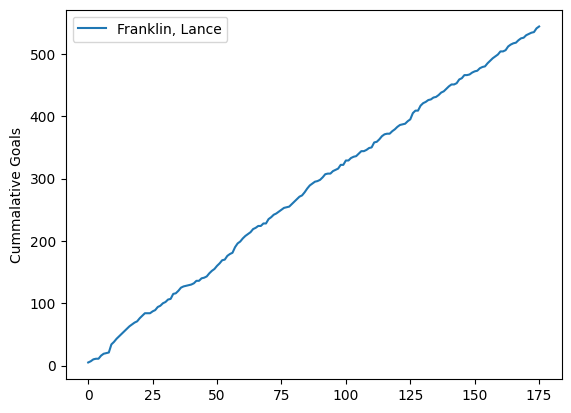

In [165]:


# mask data  based on playerId 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]=='Franklin, Lance']
playerName=playerStats.iloc[0,1]
#display(playerName)
#numnberOfGames = playerStats["gameNumber"].count()
#display(numnberOfGames)

playerStats=playerStats.sort_values(by='gameNumber')
playerStats=playerStats.set_index("gameNumber")

#display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

#x=playerStats["gameNumber"]
#y=playerStats["Goals"].cumsum()
#display (playerStats)
cumulative=playerStats["Goals"].cumsum()
cumulative=cumulative.reset_index(drop=True)
canvas = cumulative.plot(kind="line", x=176,y="playername", ylabel="Cummalative Goals", legend=True, label=playerName)

#canvas.ylabel="Goals"


'''
plt.plot (y,x)
plt.title ("Accumulation of goals by games played:" + playerName)
plt.xlabel("Game Number")
plt.ylabel("Goals")
plot.show
'''

players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]

"""
for player in players:
    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==player]
    playerStats=playerStats.sort_values(by='gameNumber')
    gameNumbers=playerStats["gameNumber"]
    cumulativeGoals=playerStats["Goals"].cumsum()


    playerStats['cumulative']=playerStats["Goals"].cumsum()
    
    
    coefficients = np.polyfit(gameNumbers, cumulativeGoals, 1)
    # - Creating the function / formula, that we can use -
    f = np.poly1d(coefficients)  
 
    # - Using our function / formula to generate predictions -
    playerStats["prediction"] = f(playerStats["gameNumber"])

    #display (playerStats["prediction"])
 
    # - Plotting everything -
    canvas = playerStats.set_index('gameNumber')['cumulative'].plot(kind='line', legend=True)

    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")
    playerStats.plot(kind='line', x='gameNumber', y='prediction', color='pink', ax=canvas) 


    #display data
    '''
    
    display(player)
    display (playerStats[["gameId","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    display(y)
    '''
    
    '''
    plt.plot (y,x)
    plt.legend(player)
    plt.title ("Accumulation of goals by games played:")
    plt.xlabel("Game Number")
    plt.ylabel("Goals")
    
    plt.show   
   '''
"""
